# Знакомство с данными

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')

In [2]:
train_data = pd.read_csv('/content/drive/My Drive/Titanic/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/Titanic/test.csv')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Посмотрим на переменные в датасете 

Бинарные:
  - Survived (0 - не выжил/ 1 - выжил)
  - Sex

Вещественные:
  - Age
  - Fare (расходы пассажира)
  - Sibsp (братья и сестры/супруги)
  - Parch (родители/дети)

Порядковые: 
  - Pclass (1st = Upper, 2nd = Middle, 3rd = Lower)

Категориальные:
  - PassengerID
  - Name
  - Ticket
  - Cabin (номер кабины)
  - Embarked (порт погрузки/ C = Cherbourg, Q = Queenstown, S = Southampton)


In [ ]:
for feature in train_data.columns:
  print('Unique values {}: '.format(feature), len(pd.unique(train_data[feature])))

Unique values PassengerId:  891
Unique values Survived:  2
Unique values Pclass:  3
Unique values Name:  891
Unique values Sex:  2
Unique values Age:  89
Unique values SibSp:  7
Unique values Parch:  7
Unique values Ticket:  681
Unique values Fare:  248
Unique values Cabin:  148
Unique values Embarked:  4


Посмотрим на типы данных

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


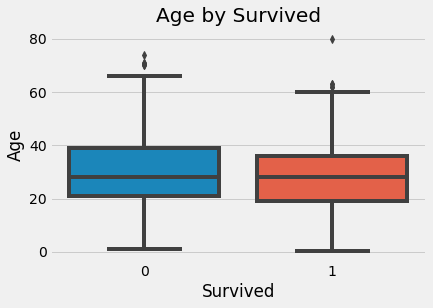

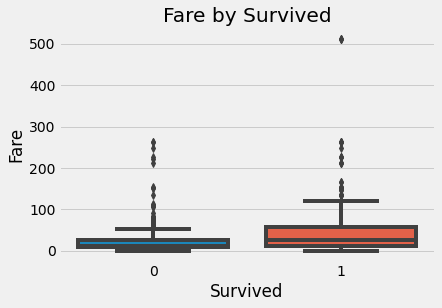

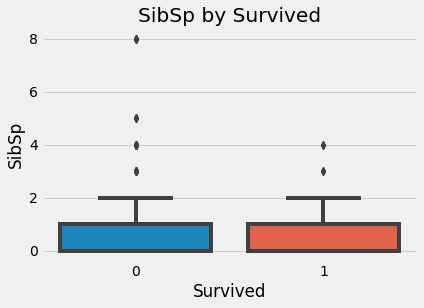

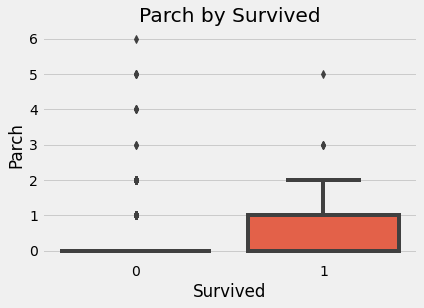

In [ ]:
# Посмотрим на распределение и выбросы вещественных признаков
num_features = ['Age', 'Fare', 'SibSp', 'Parch']
for feature in num_features:
  sns.boxplot(x='Survived', y=feature, data=train_data)
  plt.title(feature + ' by Survived')
  plt.show()

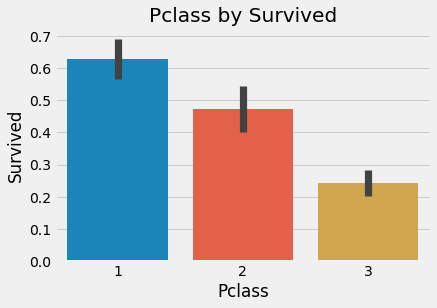

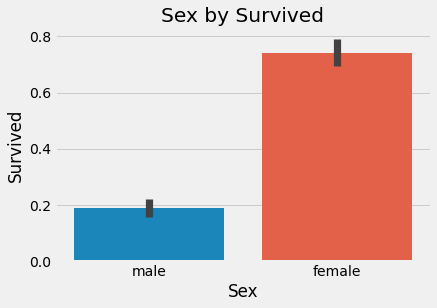

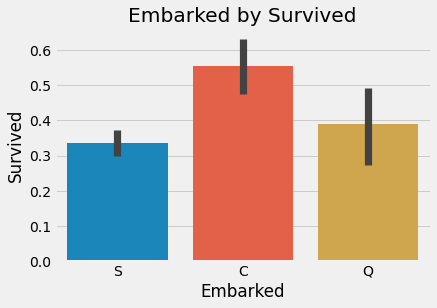

In [ ]:
# Теперь посмотрим на категориальные и бинарные признаки
cat_features = ['Pclass', 'Sex', 'Embarked']
for i in cat_features:
    sns.barplot(y="Survived",x=i,data=train_data)
    plt.title(i+" by "+"Survived")
    plt.show()

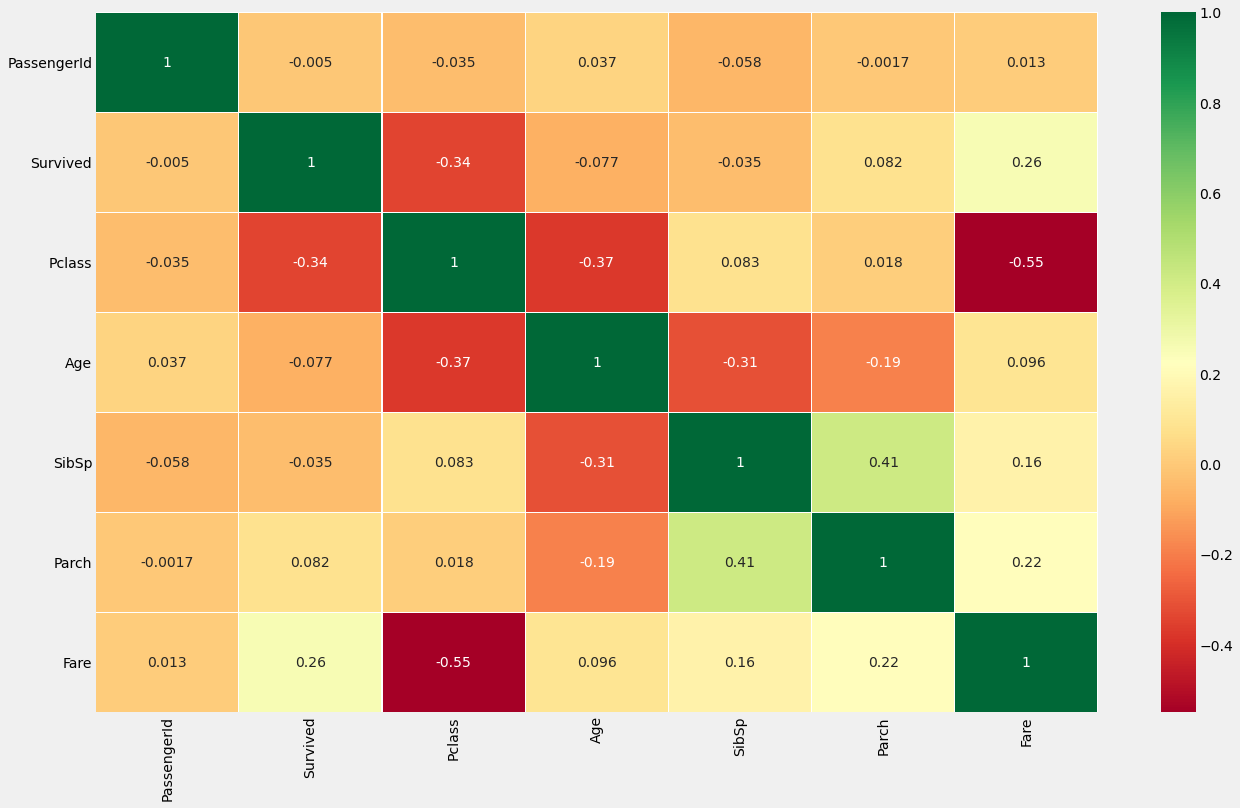

In [ ]:
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

# Предобработка данных

Избавимся от явно неинформативных переменных и создадим целевую

In [49]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

X = train_data[features]
y = train_data['Survived']

test = test_data[features]
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


Посмотрим на количество пустых значений и заполним вещественные медианой или средним

In [50]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [51]:
test.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [52]:
X.Age.fillna(value=X.Age.median(), inplace=True)
X.Embarked.fillna(value=X.Embarked.mode()[0], inplace=True)

test.Age.fillna(value=test.Age.median(), inplace=True)
test.Fare.fillna(value=test.Fare.median(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [53]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


Обработаем категориальные признаки Age, Embarked. 

In [54]:
from sklearn.preprocessing import LabelEncoder

features = ['Sex', 'Embarked']

for feature in features:
  le = LabelEncoder()
  le.fit(X[feature])
  X[feature] = le.transform(X[feature])

  le = LabelEncoder()
  le.fit(test[feature])
  test[feature] = le.transform(test[feature])

X.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


Посмотрим на сами вещественные признаки

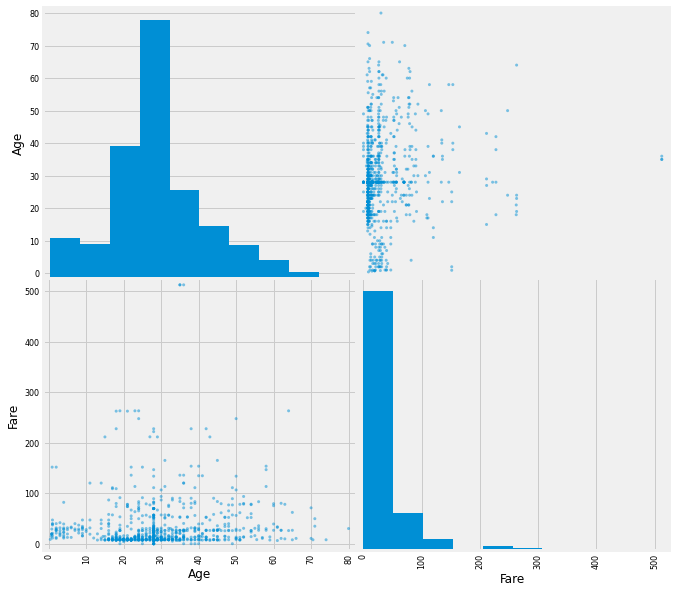

In [55]:
from pandas.plotting import scatter_matrix

scatter_matrix(X[['Age', 'Fare']], alpha=0.5, figsize=(10, 10))
plt.show()

Видим явный выброс в переменной Fare. Отбросим его.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

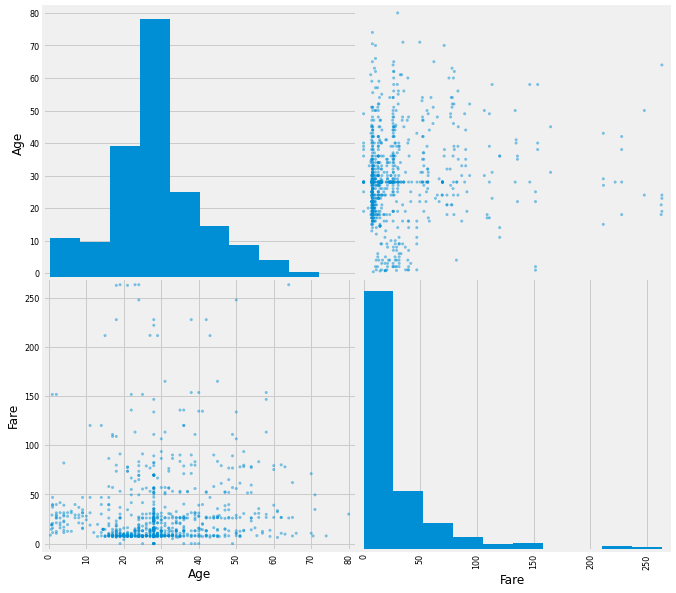

In [56]:
X[X.Fare > 4] = X.Fare.median()
test[test.Fare > 400] = test.Fare.median()
 
scatter_matrix(X[['Age', 'Fare']], alpha=0.5, figsize=(10, 10))
plt.show()

Посмотрим сбалансированы ли классы

In [39]:
print(np.sum(y==0))
print(np.sum(y==1))

549
342


## RandomForest

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score


X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [60]:
scores = []
depths = range(2, 21)

for max_depth in depths:
  clf = RandomForestClassifier(n_estimators=200,
                               criterion='gini',
                               max_depth=max_depth, 
                               max_features="sqrt", 
                               min_samples_split=2,
                               min_samples_leaf=1,
                               random_state=1).fit(X_train, y_train)

  score = cross_val_score(clf, X_test, y_test, cv=5).mean()
  scores.append(score)

0.7598412698412698


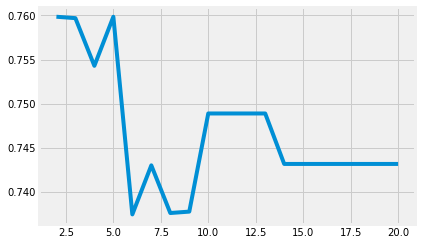

In [61]:
print(max(scores))
plt.plot(depths, scores)

Случайный лес:
- с ростом числа деревьев не переобучается, просто в какой-то момент качество перестает меняться
- с уменьшением числа деревьев лес работает хуже
- при большом числе признаков качество становится хуже. Принятая рекомендация: q = sqrt(d)
- при небольшой глубине качетсво хуже

Сделаем предсказание для лучшего clf_rf и загрузим результат на kaggle.

In [62]:
best_clf = RandomForestClassifier(n_estimators=200, 
                                  max_features="sqrt", 
                                  max_depth=7,
                                  random_state=1).fit(X_train, y_train)

predictions = best_clf.predict(test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': predictions})

output.to_csv('/content/drive/My Drive/Titanic/titanic_RF.csv', index=False)

# LogRegression 

Логистическая регрессия предсказывает вероятности принадлежности объекта к каждому классу. Сумма ответов логистической регрессии на одном объекте для всех классов равна единице.

$$ \sum_{k=1}^K \pi_{ik} = 1, \quad \pi_k \equiv P\,(y_i = k \mid x_i, \theta), $$

где:
- $\pi_{ik}$ - вероятность принадлежности объекта $x_i$ из выборки $X$ к классу $k$
- $\theta$ - внутренние параметры алгоритма, которые настраиваются в процессе обучения, в случае логистической регрессии - $w, b$

Из этого свойства модели в случае бинарной классификации требуется вычислить лишь вероятность принадлежности объекта к одному из классов (вторая вычисляется из условия нормировки вероятностей). Эта вероятность вычисляется, используя логистическую функцию:

$$ P\,(y_i = 1 \mid x_i, \theta) = \frac{1}{1 + \exp(-w^T x_i-b)} $$

Параметры $w$ и $b$ находятся, как решения следующей задачи оптимизации:

L2-regularization:

$$ Q(X, y, \theta) = \frac{1}{2} w^T w + C \sum_{i=1}^l \log ( 1 + \exp(-y_i (w^T x_i + b ) ) ) \longrightarrow \min\limits_{w,b} $$

L1-regularization:

$$ Q(X, y, \theta) = \sum_{d=1}^D |w_d| + C \sum_{i=1}^l \log ( 1 + \exp(-y_i (w^T x_i + b ) ) ) \longrightarrow \min\limits_{w,b} $$

$C$ - это стандартный гиперпараметр модели, который регулирует то, насколько сильно мы позволяем модели подстраиваться под данные.

In [44]:
from sklearn.linear_model import LogisticRegression

In [63]:
clf_LR = LogisticRegression(penalty='l2', 
                            solver='liblinear', 
                            C=1.0).fit(X_train, y_train)
print(clf_LR.score(X_test, y_test))

predictions = clf_LR.predict(test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId,
                       'Survived': predictions})

output.to_csv('/content/drive/My Drive/Titanic/titanic_LR.csv', index=False)

0.7318435754189944


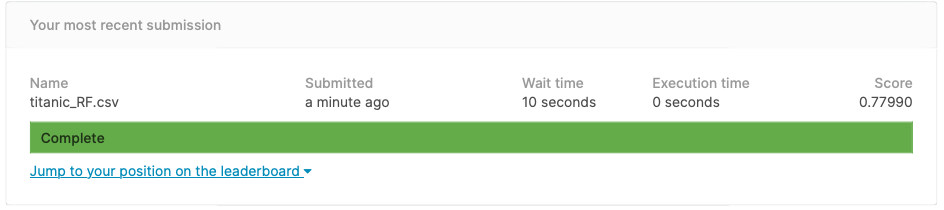

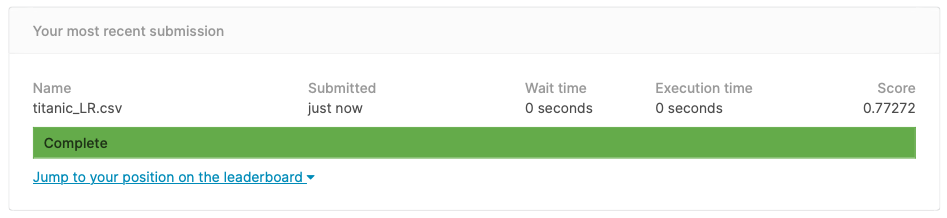